In [30]:
#Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [31]:
#Load Image
img = cv2.imread('peppers.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

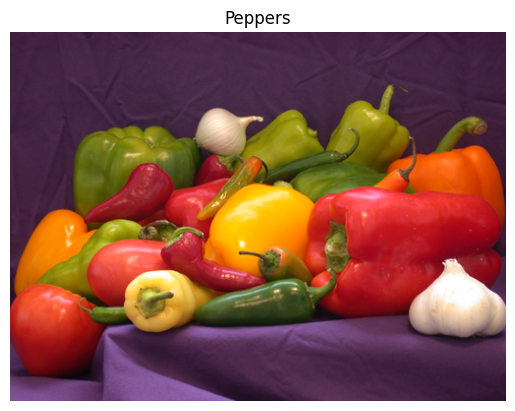

In [32]:
#Show Image
plt.imshow(img)
plt.title("Peppers")
plt.axis('off')
plt.show()


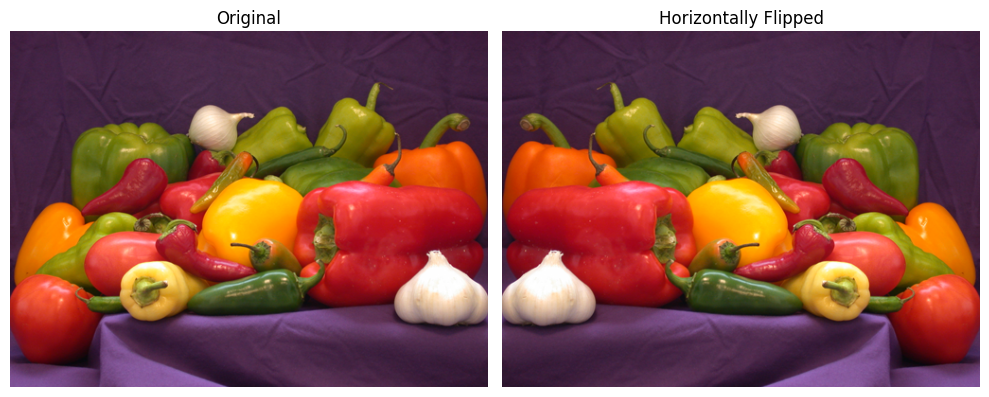

In [33]:
#Flip Horizontal Image
horiz = cv2.flip(img, 1)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(horiz)
plt.title("Horizontally Flipped")
plt.axis('off')

plt.tight_layout()
plt.show()



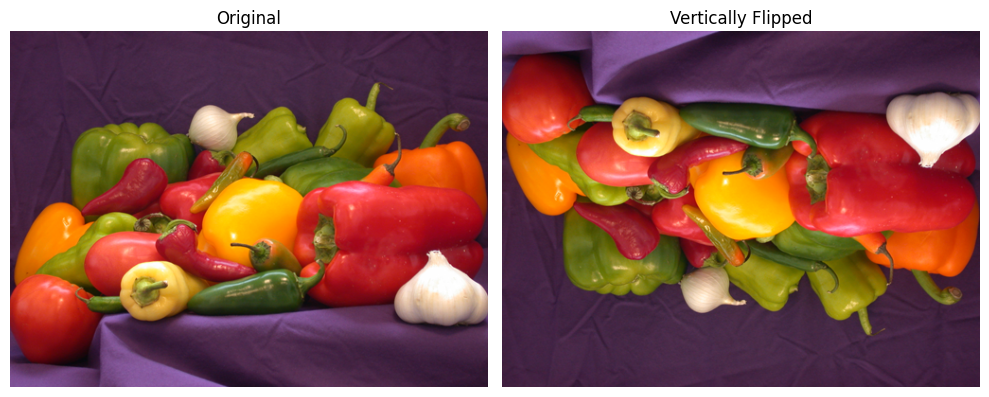

In [34]:
#Flip Vertical Image
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('peppers.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
horiz = cv2.flip(img, 0)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(horiz)
plt.title("Vertically Flipped")
plt.axis('off')

plt.tight_layout()
plt.show()

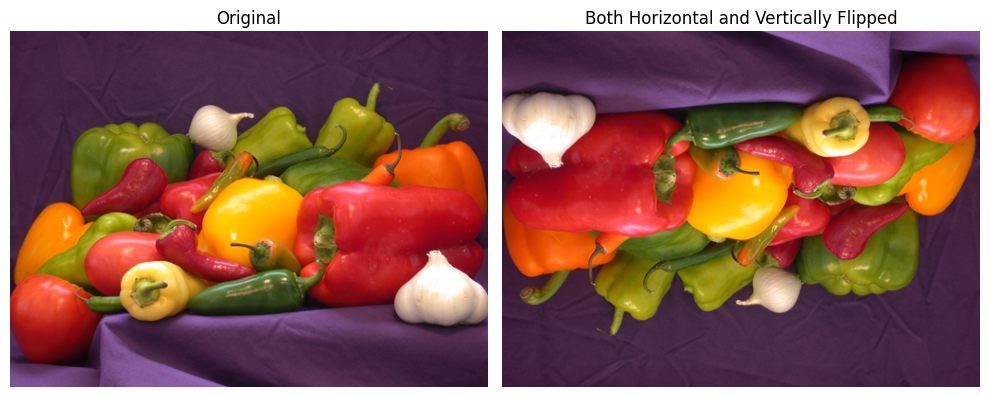

In [35]:
#Flip Both Horizontal and Vertical Image
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('peppers.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
horiz = cv2.flip(img, -1)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(horiz)
plt.title("Both Horizontal and Vertically Flipped")
plt.axis('off')

plt.tight_layout()
plt.show()

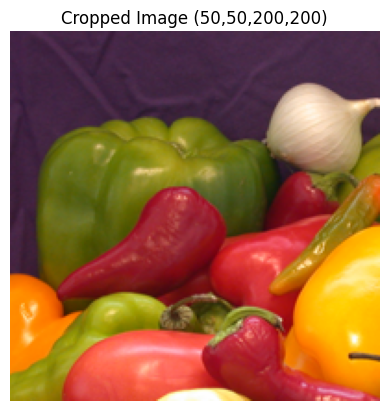

In [36]:
# Crop: (y:y+height, x:x+width)
crop = img[50:50+200, 50:50+200]

# Show cropped image
plt.imshow(crop)
plt.title("Cropped Image (50,50,200,200)")
plt.axis('off')
plt.show()


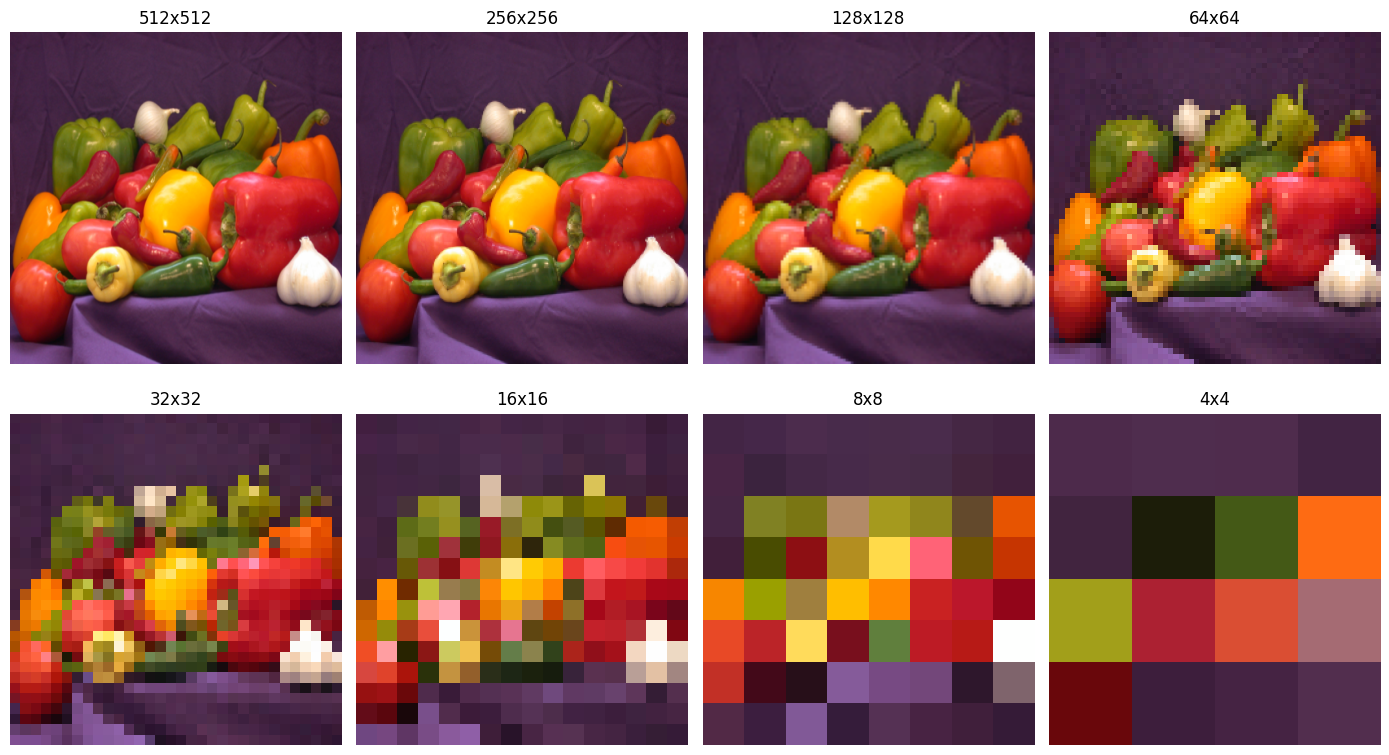

In [37]:
# Resize image based on sizes
sizes = [512, 256, 128, 64, 32, 16, 8, 4]
resized_images = [cv2.resize(img, (s, s), interpolation=cv2.INTER_LINEAR) for s in sizes]

# Display all resized versions
plt.figure(figsize=(14, 8))
for i, (resized, size) in enumerate(zip(resized_images, sizes)):
    plt.subplot(2, 4, i+1)
    plt.imshow(resized)
    plt.title(f'{size}x{size}')
    plt.axis('off')

plt.tight_layout()
plt.show()


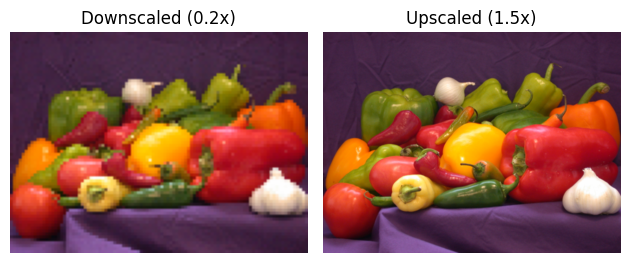

In [38]:
#Resize images based on scale

small = cv2.resize(img, None, fx=0.2, fy=0.2)  # Downscale
large = cv2.resize(img, None, fx=1.5, fy=1.5)  # Upscale

plt.subplot(1, 2, 1)
plt.imshow(small)
plt.title('Downscaled (0.2x)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(large)
plt.title('Upscaled (1.5x)')
plt.axis('off')

plt.tight_layout()
plt.show()


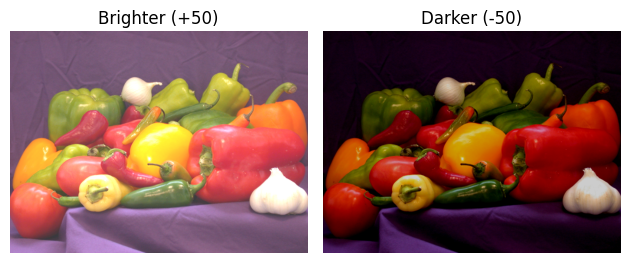

In [39]:
# Brightness Adjustment

brighter = np.clip(img.astype(np.int16) + 50, 0, 255).astype(np.uint8)
darker = np.clip(img.astype(np.int16) - 50, 0, 255).astype(np.uint8)

# Display
plt.subplot(1, 2, 1)
plt.imshow(brighter)
plt.title('Brighter (+50)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(darker)
plt.title('Darker (-50)')
plt.axis('off')

plt.tight_layout()
plt.show()



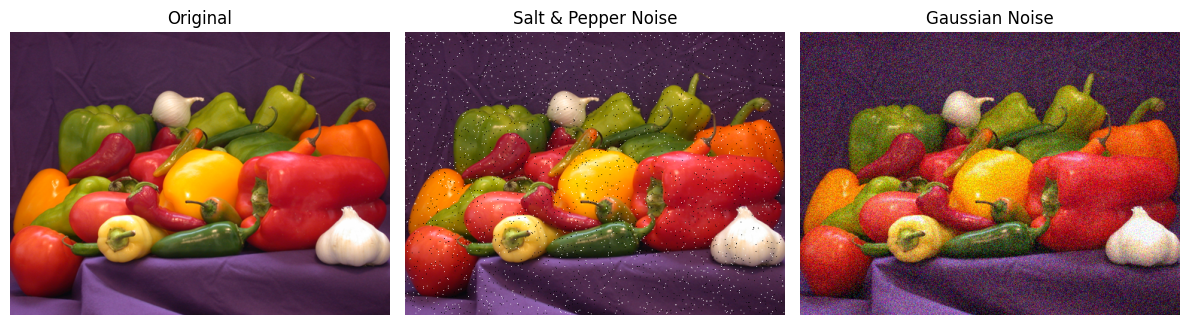

In [40]:
# Noise
# ---------- Noise Functions ----------

def add_salt_pepper_noise(image, amount=0.1):
    noisy = image.copy()
    h, w, _ = noisy.shape
    num_salt = int(amount * h * w / 2)
    num_pepper = int(amount * h * w / 2)

    coords_salt = [np.random.randint(0, i - 1, num_salt) for i in (h, w)]
    noisy[coords_salt[0], coords_salt[1]] = [255, 255, 255]

    coords_pepper = [np.random.randint(0, i - 1, num_pepper) for i in (h, w)]
    noisy[coords_pepper[0], coords_pepper[1]] = [0, 0, 0]

    return noisy

def add_gaussian_noise(image, mean=0, var=0.01):
    image = image / 255.0
    noise = np.random.normal(mean, var ** 0.5, image.shape)
    noisy = image + noise
    noisy = np.clip(noisy, 0, 1)
    return (noisy * 255).astype(np.uint8)

# ---------- Generate Noisy Images ----------
sp_noisy = add_salt_pepper_noise(img, amount=0.02)
gauss_noisy = add_gaussian_noise(img, mean=0, var=0.01)

# ---------- Display ----------
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sp_noisy)
plt.title('Salt & Pepper Noise')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gauss_noisy)
plt.title('Gaussian Noise')
plt.axis('off')

plt.tight_layout()
plt.show()


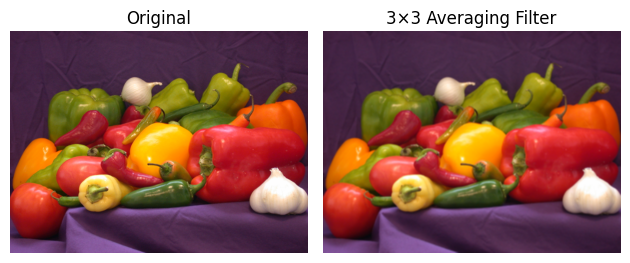

In [41]:
# Average smoothing filter

# Define 3×3 averaging kernel
kernel = np.ones((3, 3), dtype=np.float32) / 9.0

# Apply filter
filtered = cv2.filter2D(img, -1, kernel)

# Display original and filtered
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered)
plt.title('3×3 Averaging Filter')
plt.axis('off')

plt.tight_layout()
plt.show()


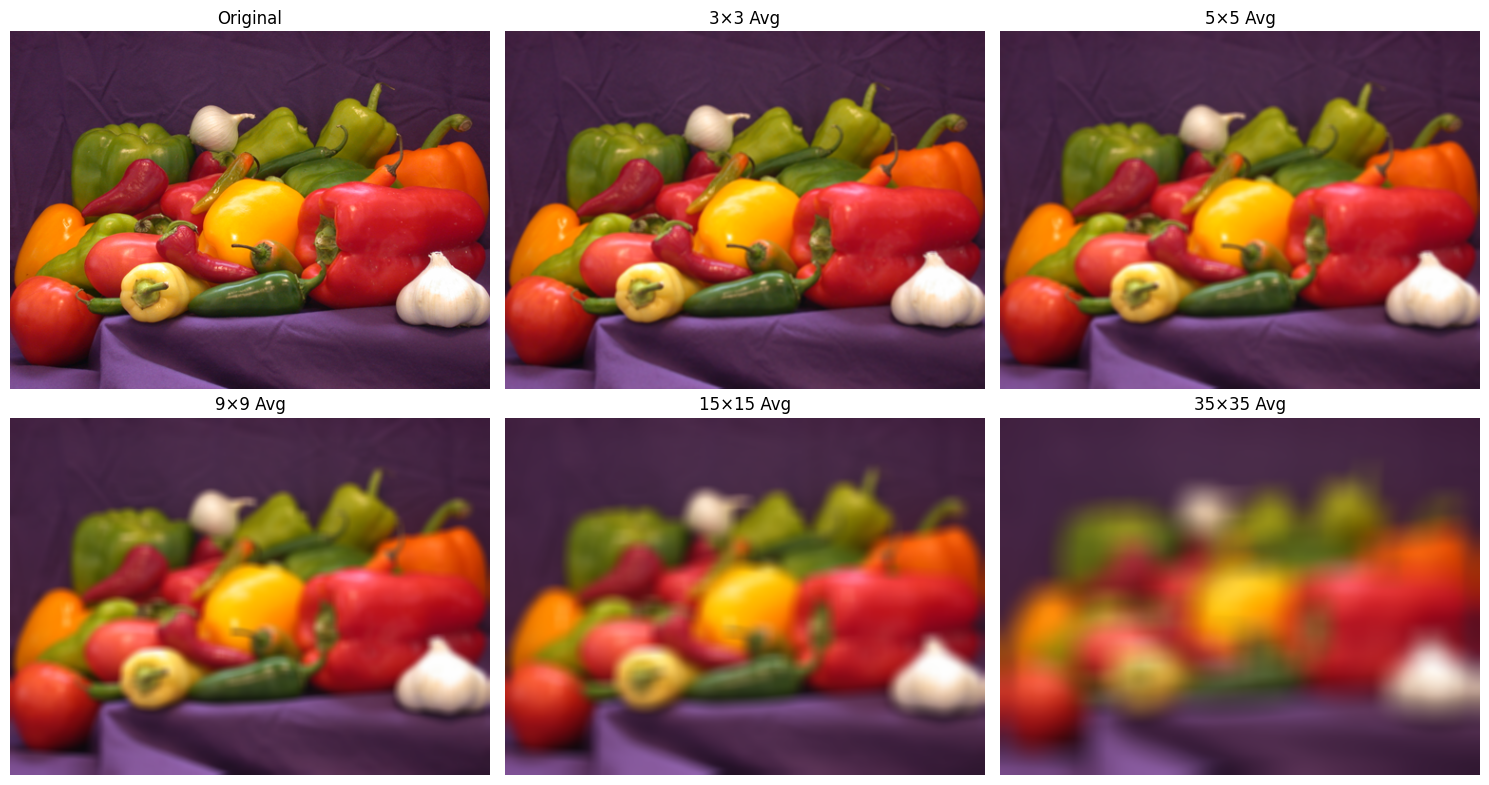

In [42]:
# ---------- Filter sizes (square kernels) ----------
sizes = [3, 5, 9, 15, 35]

# ---------- Apply each averaging filter ----------
filtered_imgs = []
for k in sizes:
    kernel = np.ones((k, k), dtype=np.float32) / (k * k)  # 1/(k²) everywhere
    filtered = cv2.filter2D(img, -1, kernel)
    filtered_imgs.append(filtered)

# ---------- Display ----------
plt.figure(figsize=(15, 8))

# Original
plt.subplot(2, 3, 1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# Filtered versions
for i, (fimg, k) in enumerate(zip(filtered_imgs, sizes), start=2):
    plt.subplot(2, 3, i)
    plt.imshow(fimg)
    plt.title(f'{k}×{k} Avg')
    plt.axis('off')

plt.tight_layout()
plt.show()
